In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import itertools
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
data = pd.read_csv("data/fluGT_ILI_US_10_19.csv")
data.shape

(435, 5)

In [6]:
data.head()

,Week,GT INFLUENZA,YEAR,WEEK2,% WEIGHTED ILI
0,10/3/2010,13,2010,40,1.10939
1,10/10/2010,13,2010,41,1.24341
2,10/17/2010,15,2010,42,1.25726
3,10/24/2010,13,2010,43,1.25734
4,10/31/2010,13,2010,44,1.43414


In [7]:
data = data[['GT INFLUENZA','% WEIGHTED ILI']]

In [8]:
data.head()

,GT INFLUENZA,% WEIGHTED ILI
0,13,1.10939
1,13,1.24341
2,15,1.25726
3,13,1.25734
4,13,1.43414


<function matplotlib.pyplot.legend(*args, **kwargs)>

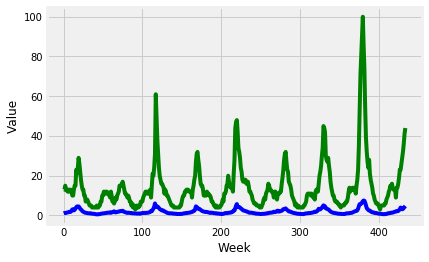

In [14]:
plt.plot(data['GT INFLUENZA'],color='green',label='Google Trends Influenza')
plt.plot(data['% WEIGHTED ILI'],color='blue',label='% Weighted ILI')
plt.xlabel('Week')
plt.ylabel('Value')
plt.legend

In [15]:
from pandas import DataFrame
from pandas import concat
 
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	""" 
    From Jason Brownlee, PhD
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [16]:
who

DataFrame	 RandomForestRegressor	 concat	 data	 itertools	 np	 pd	 plt	 series_to_supervised	 
sm	 warnings	 


In [36]:
values_data = data.values
data_lag4 = series_to_supervised(values_data,4,1)
data_lag4.head()

,var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
4,13.0,1.10939,13.0,1.24341,15.0,1.25726,13.0,1.25734,13.0,1.43414
5,13.0,1.24341,15.0,1.25726,13.0,1.25734,13.0,1.43414,12.0,1.51838
6,15.0,1.25726,13.0,1.25734,13.0,1.43414,12.0,1.51838,13.0,1.61617
7,13.0,1.25734,13.0,1.43414,12.0,1.51838,13.0,1.61617,12.0,1.84378
8,13.0,1.43414,12.0,1.51838,13.0,1.61617,12.0,1.84378,13.0,1.72535


In [37]:
data_lag4.shape

(431, 10)

In [38]:
data_lag4.tail()

,var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
430,19.0,2.64702,23.0,3.16945,23.0,3.98104,26.0,3.46991,29.0,3.08666
431,23.0,3.16945,23.0,3.98104,26.0,3.46991,29.0,3.08666,32.0,3.31026
432,23.0,3.98104,26.0,3.46991,29.0,3.08666,32.0,3.31026,36.0,3.77069
433,26.0,3.46991,29.0,3.08666,32.0,3.31026,36.0,3.77069,41.0,4.31372
434,29.0,3.08666,32.0,3.31026,36.0,3.77069,41.0,4.31372,44.0,4.76853


In [25]:
# test supervised to input/output patterns
from numpy import array
 
# created input/output patterns from a sequence
def supervised_for_lead_time(series, n_lag, lead_time):
    """
    From Jason Brownlee, PhD
    """
	data = list()
	# enumerate observations and create input/output patterns
	for i in range(n_lag, len(series)):
		end_ix = i + (lead_time - 1)
		# check if can create a pattern
		if end_ix >= len(series):
			break
		# retrieve input and output
		start_ix = i - n_lag
		row = series[start_ix:i] + [series[end_ix]]
		data.append(row)
	return array(data)

In [39]:
who

DataFrame	 RandomForestRegressor	 array	 concat	 data	 data_lag4	 itertools	 np	 pd	 
plt	 series_to_supervised	 sm	 supervised_for_lead_time	 values_data	 warnings	 


In [28]:
data.head()

,GT INFLUENZA,% WEIGHTED ILI
0,13,1.10939
1,13,1.24341
2,15,1.25726
3,13,1.25734
4,13,1.43414


In [29]:
data.shape

(435, 2)

In [30]:
data_lag4.shape

(431, 10)

In [40]:
data_lag4.head()

,var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
4,13.0,1.10939,13.0,1.24341,15.0,1.25726,13.0,1.25734,13.0,1.43414
5,13.0,1.24341,15.0,1.25726,13.0,1.25734,13.0,1.43414,12.0,1.51838
6,15.0,1.25726,13.0,1.25734,13.0,1.43414,12.0,1.51838,13.0,1.61617
7,13.0,1.25734,13.0,1.43414,12.0,1.51838,13.0,1.61617,12.0,1.84378
8,13.0,1.43414,12.0,1.51838,13.0,1.61617,12.0,1.84378,13.0,1.72535


In [45]:
data_ts = pd.read_csv("data/fluGT_ILI_US_10_19_with53week.csv")
data_ts.shape

(437, 5)

In [46]:
data_ts.head()

,Week,influenza: (United States),YEAR,WEEK,% WEIGHTED ILI
0,10/3/2010,13,2010,40,1.10939
1,10/10/2010,13,2010,41,1.24341
2,10/17/2010,15,2010,42,1.25726
3,10/24/2010,13,2010,43,1.25734
4,10/31/2010,13,2010,44,1.43414


In [79]:
y=data_ts[['% WEIGHTED ILI']]
y.shape

(437, 1)

In [80]:
y.index = pd.DatetimeIndex(freq='W',start='2010-10-03',periods=437)
y.index

DatetimeIndex(['2010-10-03', '2010-10-10', '2010-10-17', '2010-10-24',
               '2010-10-31', '2010-11-07', '2010-11-14', '2010-11-21',
               '2010-11-28', '2010-12-05',
               ...
               '2018-12-09', '2018-12-16', '2018-12-23', '2018-12-30',
               '2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10'],
              dtype='datetime64[ns]', length=437, freq='W-SUN')

In [81]:
y.head()

,% WEIGHTED ILI
2010-10-03,1.10939
2010-10-10,1.24341
2010-10-17,1.25726
2010-10-24,1.25734
2010-10-31,1.43414


In [82]:
y.tail()

,% WEIGHTED ILI
2019-01-13,3.08666
2019-01-20,3.31026
2019-01-27,3.77069
2019-02-03,4.31372
2019-02-10,4.76853


In [83]:
y.index

DatetimeIndex(['2010-10-03', '2010-10-10', '2010-10-17', '2010-10-24',
               '2010-10-31', '2010-11-07', '2010-11-14', '2010-11-21',
               '2010-11-28', '2010-12-05',
               ...
               '2018-12-09', '2018-12-16', '2018-12-23', '2018-12-30',
               '2019-01-06', '2019-01-13', '2019-01-20', '2019-01-27',
               '2019-02-03', '2019-02-10'],
              dtype='datetime64[ns]', length=437, freq='W-SUN')

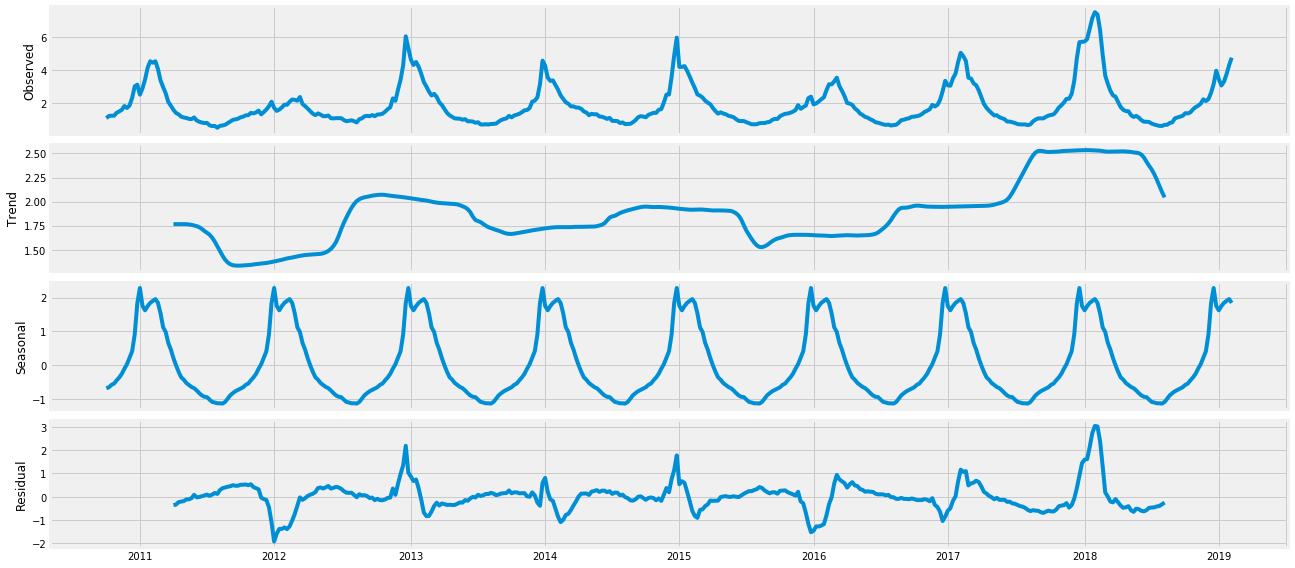

In [84]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [85]:
# Prepare pdq and seasonal_pdq 
p = d = q = np.arange(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 52)
SARIMAX: (0, 0, 1) x (0, 1, 0, 52)
SARIMAX: (0, 1, 0) x (0, 1, 1, 52)
SARIMAX: (0, 1, 0) x (1, 0, 0, 52)


In [86]:
# Grid search for the best pdq and seasonal pdq based on aic 
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}52 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 52)52 - AIC:1958.4279664422413
ARIMA(0, 0, 0)x(0, 0, 1, 52)52 - AIC:1426.6942761508262
ARIMA(0, 0, 0)x(0, 1, 0, 52)52 - AIC:1061.1426018898344
ARIMA(0, 0, 0)x(0, 1, 1, 52)52 - AIC:793.7828854647012
ARIMA(0, 0, 0)x(1, 0, 0, 52)52 - AIC:1053.5128236563307
ARIMA(0, 0, 0)x(1, 0, 1, 52)52 - AIC:906.4594466835661
ARIMA(0, 0, 0)x(1, 1, 0, 52)52 - AIC:824.1705083480356
ARIMA(0, 0, 0)x(1, 1, 1, 52)52 - AIC:822.1010654739787
ARIMA(0, 0, 1)x(0, 0, 0, 52)52 - AIC:1397.7807067527892
ARIMA(0, 0, 1)x(0, 0, 1, 52)52 - AIC:962.0583167499312
ARIMA(0, 0, 1)x(0, 1, 0, 52)52 - AIC:660.8718906903905
ARIMA(0, 0, 1)x(0, 1, 1, 52)52 - AIC:456.8730908567394
ARIMA(0, 0, 1)x(1, 0, 0, 52)52 - AIC:649.6090001367154
ARIMA(0, 0, 1)x(1, 0, 1, 52)52 - AIC:517.1750155223015
ARIMA(0, 0, 1)x(1, 1, 0, 52)52 - AIC:495.2431481565858
ARIMA(0, 0, 1)x(1, 1, 1, 52)52 - AIC:487.23163043444464
ARIMA(0, 1, 0)x(0, 0, 0, 52)52 - AIC:235.68085212594673
ARIMA(0, 1, 0)x(0, 0, 1, 52)52 - AIC:150.85055711916334
AR

In [124]:
# Build a model using the best pdq and seasonal_pdq with the lowest AIC 72.1
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 0, 0, 52),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9714      0.007    136.307      0.000       0.957       0.985
ma.L1          0.3289      0.027     12.228      0.000       0.276       0.382
ar.S.L52       0.4506      0.025     17.674      0.000       0.401       0.501
sigma2         0.0694      0.002     37.404      0.000       0.066       0.073


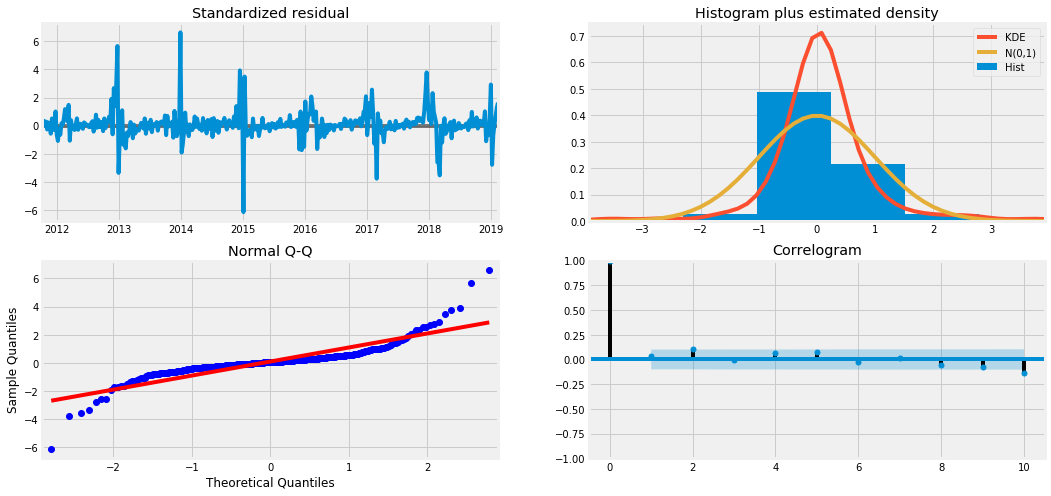

In [125]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

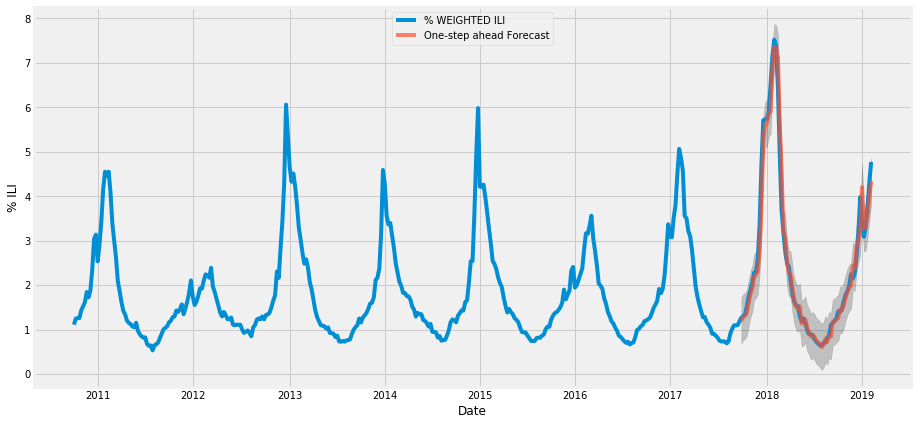

In [132]:
# Predict % ILI for the 2017-2018 season and a part of 2018-2019 season 
pred = results.get_prediction(start=pd.to_datetime('2017-10-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('% ILI')
plt.legend(loc='upper center')
plt.show()

In [127]:
# Calculate MSE
y_forecasted = pred.predicted_mean
y_truth = y['2017-10-01':]
mse = ((y_forecasted - y_truth['% WEIGHTED ILI']) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.09


In [128]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 0.29


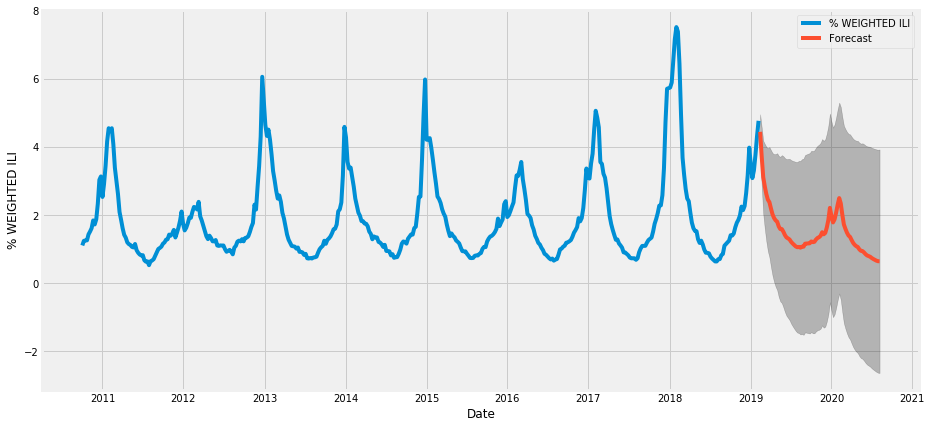

In [133]:
pred_uc = results.get_forecast(steps=78)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ili_pred_pd = pd.DataFrame(pred_uc.predicted_mean)
ili_pred_pd.columns = ['Forecast % WEIGHTED ILI']
ili_pred_pd.to_csv("ili_pred_2019-2020.csv")
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('% WEIGHTED ILI')
plt.legend()
plt.show()

In [135]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    From Jason Brownlee
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
            
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    
    return agg

In [136]:
who

DataFrame	 ILI_52wk	 ILI_ts	 RandomForestRegressor	 array	 ax	 concat	 d	 data	 
data_52wk	 data_lag4	 data_ts	 decomposition	 fig	 ili_pred_pd	 itertools	 mod	 mse	 
np	 p	 param	 param_seasonal	 pd	 pdq	 plt	 pred	 pred_ci	 
pred_uc	 q	 rcParams	 results	 seasonal_pdq	 series_to_supervised	 sm	 supervised_for_lead_time	 values_data	 
warnings	 y	 y_forecasted	 y_truth	 


In [142]:
tmpin = [x for x in np.arange(10)]
tmpts = series_to_supervised(tmpin,1,2)
tmpts

,var1(t-1),var1(t),var1(t+1)
1,0.0,1,2.0
2,1.0,2,3.0
3,2.0,3,4.0
4,3.0,4,5.0
5,4.0,5,6.0
6,5.0,6,7.0
7,6.0,7,8.0
8,7.0,8,9.0
